# Método de Hartree-Fock para a Molécula de H<sub>2</sub>

Autor: [Prof. Elvis do A. Soares](https://github.com/elvissoares) 

Contato: [elvis@peq.coppe.ufrj.br](mailto:elvis@peq.coppe.ufrj.br) - [Programa de Engenharia Química, PEQ/COPPE, UFRJ, Brasil](https://www.peq.coppe.ufrj.br/)

---

## Função de Onda 

A função de onda molecular do $H_2$ é dada por 

$$ \psi(\boldsymbol{r}_1,\boldsymbol{r}_2) = \psi(\boldsymbol{r}_1)\psi(\boldsymbol{r}_2)$$

com a função de onda de 1 elétron dada por 

$$\psi(\boldsymbol{r}) = c_A \phi_A(\boldsymbol{r}) + c_B \phi_B(\boldsymbol{r})$$

com $A$ e $B$ representando cada núcleo de $H$, e as funções de onda atômicas $\phi_i$ sendo escritas como orbitais de Slater na forma 

$$\phi_i(\boldsymbol{r}) = \left(\frac{\zeta^3}{\pi}\right)^{1/2} e^{-\zeta |\boldsymbol{r}-\boldsymbol{R}_i|}$$

sendo $\boldsymbol{R}_i$ a posição do núcleo de $H$ e $\zeta$ o parâmetro variacional. 

Como solução das equações de Hartree-Fock, e devido a simetria do sistema, temos as seguintes funções de onda para 1 elétron

$$\psi_\pm(\boldsymbol{r}) = \frac{1}{\sqrt{2(1\pm S)}} \left[\phi_A(\boldsymbol{r}) \pm  \phi_B(\boldsymbol{r})\right]$$

onde $S$ é o overlap dado por 

$$S = \int \phi_A^*(\boldsymbol{r})\phi_B(\boldsymbol{r})\ \text{d}\boldsymbol{r} = e^{-w}(1+w+w^2/3)$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1

# import scienceplots
# plt.style.use(['notebook'])

In [2]:
# overlap
def S(w):
    return np.exp(-w)*(1+w+w**2/3)

# Define a constant zeta
zeta = 1.193

def distance(x, y):
    return np.sqrt(x ** 2 + y ** 2)

In [3]:
from ipywidgets import interact, FloatSlider

# Function to plot the 2D and 1D psi wave function
def plot_psi(R):
    # Define the range of positions in x and y direction
    d = 3.0
    x = np.linspace(-d, d, 300)
    y = np.linspace(-d, d, 300)
    
    # Create a grid of positions using meshgrid
    X, Y = np.meshgrid(x, y)
    
    # Calculate distances from the two nuclei
    ra = distance(X - R / 2, Y)  # Distance from nucleus 1
    rb = distance(X + R / 2, Y)  # Distance from nucleus 2
    
    # Calculate the 2D psi using given formulas
    Z = np.sqrt(zeta**3 / (np.pi * (1 + S(R)))) * (np.exp(-zeta * ra) + np.exp(-zeta * rb)) 
    
    # Plot the 2D psi as a filled contour plot
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    cf = plt.contourf(X, Y, Z, cmap='Blues')
    plt.title(rf'Função de Onda em 2D para $R/a_0$ = {R:.2f}', fontsize=12)
    cbar = plt.colorbar(cf)
    cbar.set_label(r'$\psi_+(x,y)$')
    cbar.ax.tick_params()
    plt.scatter([-R/2, R/2], [0, 0],marker='+', color='k')
    plt.xlabel(r'$x/a_0$')
    plt.ylabel(r'$y/a_0$')
    plt.tick_params(axis='both', which='major')
    
    # Calculate 1D psi along the x-axis
    ra_1d = distance(x - R / 2, 0)  # Distance from nucleus 1 in 1D
    rb_1d = distance(x + R / 2, 0)  # Distance from nucleus 2 in 1D
    psi_1d = np.sqrt(zeta**3 / (np.pi * (1 + S(R)))) * (np.exp(-zeta * ra_1d) + np.exp(-zeta * rb_1d)) 
    
    # Plot the 1D psi along the x-axis
    plt.subplot(1, 2, 2)
    plt.plot(x, psi_1d, linewidth=2)

    plt.plot(x,np.sqrt(zeta**3/np.pi) * np.exp(-2* zeta* ra_1d),':', color='gray')
    plt.plot(x,np.sqrt(zeta**3/np.pi) * np.exp(-2 * zeta* rb_1d),':', color='gray')
    
    # Add vertical lines at the two maxima
    offset = 0.1
    plt.axvline(-R/2, color='k', linestyle='--', linewidth=1)
    plt.axvline(R/2, color='k', linestyle='--', linewidth=1)
    
    # Add labels to the vertical lines
    plt.text(-R/2 - offset, np.max(psi_1d) * 0.1, f'$x$ = {-R/2:.2f}', color='k', fontsize=12, ha='right')  
    plt.text(R/2 + offset, np.max(psi_1d) * 0.1, f'$x$ = {R/2:.2f}', color='k', fontsize=12, ha='left')  
    
    # Customize the 1D plot
    plt.title('Função de Onda em 1D para $y$ = 0', fontsize=12)
    plt.xlabel(r'$x/a_0$')
    # plt.ylim(0,0.5)
    plt.xlim(-d, d)
    plt.tick_params(axis='both', which='major')
    
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

In [ ]:
# Create an interactive slider for adjusting the parameter R
interact(plot_psi, R=FloatSlider(min=0, max=5, step=0.02, value=1.385, description='R/a0'))

interactive(children=(FloatSlider(value=1.385, description='R/a0', max=5.0), Output()), _dom_classes=('widget-…

<function __main__.plot_psi(R)>

## Densidade Eletrônica

Nesse caso temos como densidade eletrônica 

$$\rho(\boldsymbol{r}) = 2 |\psi(\boldsymbol{r})|^2$$

In [5]:
# Function to plot the 2D and 1D density
def plot_rho(R):
    # Define the range of positions in x and y direction
    d = 3.0
    x = np.linspace(-d, d, 300)
    y = np.linspace(-d, d, 300)
    
    # Create a grid of positions using meshgrid
    X, Y = np.meshgrid(x, y)
    
    # Calculate distances from the two nuclei
    ra = distance(X - R / 2, Y)  # Distance from nucleus 1
    rb = distance(X + R / 2, Y)  # Distance from nucleus 2
    
    # Calculate the 2D density using given formulas
    Z = 2*(zeta**3 / (np.pi * (1 + S(R)))) * (np.exp(-zeta * ra) + np.exp(-zeta * rb)) ** 2
    
    # Plot the 2D density as a filled contour plot
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    cf = plt.contourf(X, Y, Z, cmap='Blues')
    plt.title(rf'Densidade em 2D para $R/a_0$ = {R:.2f}', fontsize=12)
    cbar = plt.colorbar(cf)
    cbar.set_label(r'$\rho(x,y)$')
    cbar.ax.tick_params()
    plt.scatter([-R/2, R/2], [0, 0],marker='+', color='k')
    plt.xlabel(r'$x/a_0$')
    plt.ylabel(r'$y/a_0$')
    plt.tick_params(axis='both', which='major')
    
    # Calculate 1D density along the x-axis
    ra_1d = distance(x - R / 2, 0)  # Distance from nucleus 1 in 1D
    rb_1d = distance(x + R / 2, 0)  # Distance from nucleus 2 in 1D
    density_1d = 2*(zeta**3 / (np.pi * (1 + S(R)))) * (np.exp(-zeta * ra_1d) + np.exp(-zeta * rb_1d)) ** 2
    
    # Plot the 1D density along the x-axis
    plt.subplot(1, 2, 2)
    plt.plot(x, density_1d, linewidth=2)

    plt.plot(x,2*(zeta**3/np.pi) * np.exp(-2* zeta* ra_1d),':', color='gray')
    plt.plot(x,2*(zeta**3/np.pi) * np.exp(-2 * zeta* rb_1d),':', color='gray')
    
    # Add vertical lines at the two maxima
    offset = 0.1
    plt.axvline(-R/2, color='k', linestyle='--', linewidth=1)
    plt.axvline(R/2, color='k', linestyle='--', linewidth=1)
    
    # Add labels to the vertical lines
    plt.text(-R/2 - offset, np.max(density_1d) * 0.1, f'$x$ = {-R/2:.2f}', color='k', fontsize=12, ha='right')  
    plt.text(R/2 + offset, np.max(density_1d) * 0.1, f'$x$ = {R/2:.2f}', color='k', fontsize=12, ha='left')  
    
    # Customize the 1D density plot
    plt.title('Densidade em 1D para $y$ = 0', fontsize=12)
    plt.xlabel(r'$x/a_0$')
    # plt.ylim(0,0.5)
    plt.xlim(-d, d)
    plt.tick_params(axis='both', which='major')
    
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

In [ ]:
# Create an interactive slider for adjusting the parameter R
interact(plot_rho, R=FloatSlider(min=0, max=5, step=0.02, value=1.385, description='R/a0'))

interactive(children=(FloatSlider(value=1.385, description='R/a0', max=5.0, step=0.02), Output()), _dom_classe…

<function __main__.plot_rho(R)>

## Cálculo de Energia

Para cada estado de orbital molecular $\psi_\pm$, a energia será dada por 
$$E_\pm = \frac{F_{AA}\pm F_{AB}}{1\pm S} $$
com $F_{ij} = 2 H_{ij} + G_{ij}$ sendo os elementos da matriz de Fock, com
$$ 
\begin{align}
    H_{ij} = H_{ji} = \Biggl\langle \phi_i(\boldsymbol{r}_1)\Biggl |-\frac{1}{2}\nabla_1^2 - \frac{1}{|\boldsymbol{r}_1-\boldsymbol{R}_A|}- \frac{1}{|\boldsymbol{r}_1-\boldsymbol{R}_B|}\Biggr|\phi_j(\boldsymbol{r}_1) \Biggr \rangle
\end{align}
$$
e
$$
\begin{align}
    G_{ij} = G_{ji} =\ & \frac{1}{c_A^2 + 2 c_A c_B S_{ab}+ c_B^2} \left\{c_A^2 \Biggl\langle \phi_i(\boldsymbol{r}_1)\phi_A(\boldsymbol{r}_2)\Biggl |\frac{1}{|\boldsymbol{r}_1-\boldsymbol{r}_2|} \Biggr|\phi_j(\boldsymbol{r}_1)\phi_A(\boldsymbol{r}_2) \Biggr \rangle \right. \nonumber \\
    &+ c_A c_B  \Biggl\langle \phi_i(\boldsymbol{r}_1)\phi_A(\boldsymbol{r}_2)\Biggl |\frac{1}{|\boldsymbol{r}_1-\boldsymbol{r}_2|} \Biggr|\phi_j(\boldsymbol{r}_1)\phi_B(\boldsymbol{r}_2) \Biggr \rangle \nonumber \\
    &+ c_A c_B  \Biggl\langle \phi_i(\boldsymbol{r}_1)\phi_B(\boldsymbol{r}_2)\Biggl |\frac{1}{|\boldsymbol{r}_1-\boldsymbol{r}_2|} \Biggr|\phi_j(\boldsymbol{r}_1)\phi_A(\boldsymbol{r}_2) \Biggr \rangle \nonumber \\
    &\left.+ c_B^2 \Biggl\langle \phi_i(\boldsymbol{r}_1)\phi_B(\boldsymbol{r}_2)\Biggl |\frac{1}{|\boldsymbol{r}_1-\boldsymbol{r}_2|} \Biggr|\phi_j(\boldsymbol{r}_1)\phi_B(\boldsymbol{r}_2) \Biggr \rangle \right\}
\end{align}
$$

Além disso, devemos adicionar a energia de repulsão entre os núcleos de H de modo que  
$$E_\pm = \frac{F_{AA}\pm F_{AB}}{1\pm S} +  \frac{1}{|\boldsymbol{R}_A-\boldsymbol{R}_B|}$$

In [7]:
# funções auxiliares
def J(w):
    return np.exp(-2*w)*(1+1/w)-1/w

def K(w):
    return -np.exp(-w)*(1+w)

def Jp(w):
    return (1/w)*(1-np.exp(-2*w)*(1+11*w/8+3*w**2/4+w**3/6))

def L(w):
    return np.exp(-w)*(w+1/8+5/(16*w))-np.exp(-3*w)*(1/8+5/(16*w))

def Sp(w):
    return np.exp(w)*(1-w+w**2/3)

def Kp(w):
    return 0.2*(np.exp(-2*w)*(25/8-23*w/4-3*w**2-w**3/3)+(6/w)*(S(w)**2*(np.euler_gamma+np.log(w))-Sp(w)**2*exp1(4*w)+2*S(w)*Sp(w)*exp1(2*w)))

In [8]:
warray = np.array([0.00001,1,1.5,2.0,2.5,3.0,3.5,5.0,7.0])

print(f'{"w":6} {"S":10} {"J":10} {"K":10} {"Jp":10} {"L":10} {"Kp":10}')
for w in warray:
    print(f'{w:1.1f} {S(w):10.6f} {J(w):10.6f} {K(w):10.6f} {Jp(w):10.6f} {L(w):10.6f} {Kp(w):10.6f}')

#conferido com https://pubs.acs.org/doi/abs/10.1021/ed048p494 (Table 1)

w      S          J          K          Jp         L          Kp        
0.0   1.000000  -1.000000  -1.000000   0.625000   0.625000   0.625000
1.0   0.858385  -0.729329  -0.735759   0.554521   0.507045   0.436652
1.5   0.725173  -0.583688  -0.557825   0.490337   0.405369   0.296835
2.0   0.586453  -0.472527  -0.406006   0.425974   0.308036   0.184156
2.5   0.458308  -0.390567  -0.287297   0.368388   0.225595   0.106622
3.0   0.348509  -0.330028  -0.199148   0.319803   0.160742   0.058508
3.5   0.259194  -0.284542  -0.135888   0.279944   0.112156   0.030766
5.0   0.096577  -0.199946  -0.040428   0.199569   0.034953   0.003717
7.0   0.022189  -0.142856  -0.007295   0.142845   0.006538   0.000168


In [20]:
# Elementos de Matriz do Hamiltoniano
def H_AA(zeta,R):
    w = zeta*R
    return zeta**2/2-zeta+zeta*J(w)

def H_AB(zeta,R):
    w = zeta*R
    return -zeta**2*(S(w)/2+K(w))+2*zeta*K(w)

def G_AA(zeta,R,cA,cB):
    w = zeta*R
    return (cA**2*(5*zeta/8)+2*cA*cB*zeta*L(w)+cB**2*zeta*Jp(w))/(cA**2+2*cA*cB*S(w)+cB**2)

def G_AB(zeta,R,cA,cB):
    w = zeta*R
    return ((cA**2+cB**2)*zeta*L(w)+2*cA*cB*zeta*Kp(w))/(cA**2+2*cA*cB*S(w)+cB**2)

In [ ]:
print(f'{"w":6} {"H_AA":10} {"H_AB":10} {"G_AA":10} {"G_AB":10}')
for w in warray[1:]:
    cA = cB = 1/np.sqrt(2*(1+S(w)))
    print(f'{w:1.1f} {H_AA(1.0,w):10.6f} {H_AB(1.0,w):10.6f} {G_AA(1.0,w,cA,cB):10.6f} {G_AB(1.0,w,cA,cB):10.6f}')

w      H_AA       H_AB       G_AA       G_AB      
1.0  -1.229329  -1.164952   0.590193   0.507804
1.5  -1.083688  -0.920412   0.558227   0.407034
2.0  -0.972527  -0.699232   0.525401   0.310247
2.5  -0.890567  -0.516451   0.495293   0.227810
3.0  -0.830028  -0.373403   0.469514   0.162587
3.5  -0.784542  -0.265485   0.448404   0.113502
5.0  -0.699946  -0.088716   0.407849   0.035264
7.0  -0.642856  -0.018390   0.381984   0.006560


In [50]:
# Elementos da Matriz de Fock
def F_AA(zeta,R,cA,cB):
    return 2*H_AA(zeta,R)+G_AA(zeta,R,cA,cB)

def F_AB(zeta,R,cA,cB):
    return 2*H_AB(zeta,R)+G_AB(zeta,R,cA,cB)

In [51]:
def Eplus(zeta,R):
    w = zeta*R
    cA = cB = 1/np.sqrt(2*(1+S(w)))
    return (F_AA(zeta,R,cA,cB)+F_AB(zeta,R,cA,cB))/(1+S(w)) + 1/R

def Eminus(zeta,R):
    w = zeta*R
    cA = 1/np.sqrt(2*(1-S(w)))
    cB = -cA
    return (F_AA(zeta,R,cA,cB)-F_AB(zeta,R,cA,cB))/(1-S(w))+ 1/R

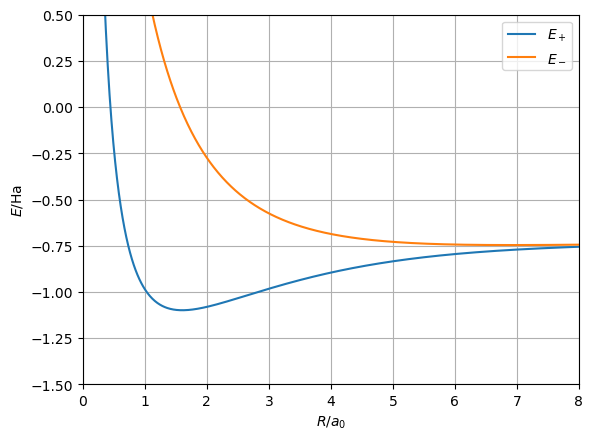

In [52]:
Rarray = np.arange(0.1, 8.0, 0.01)  # Valores de R

plt.plot(Rarray, Eplus(1.0,Rarray), label=r'$E_+$')
plt.plot(Rarray, Eminus(1.0,Rarray), label=r'$E_-$')

plt.xlim(0,8)
plt.ylim(-1.5, 0.5)

plt.grid()

plt.xlabel(r'$R/a_0$')
plt.ylabel(r'$E/$Ha')
plt.legend()

## Minimizando a Energia do Nível Fundamental $\psi_+$

In [53]:
x0 = np.array([1.0,1.2])  # Valor inicial para a otimização

from scipy.optimize import minimize

def Eplus_tominimize(x):
    zeta, R = x
    return Eplus(zeta, R)

res = minimize(Eplus_tominimize, x0, method='Nelder-Mead', tol=1e-8)

res.x

array([1.19301753, 1.38543393])

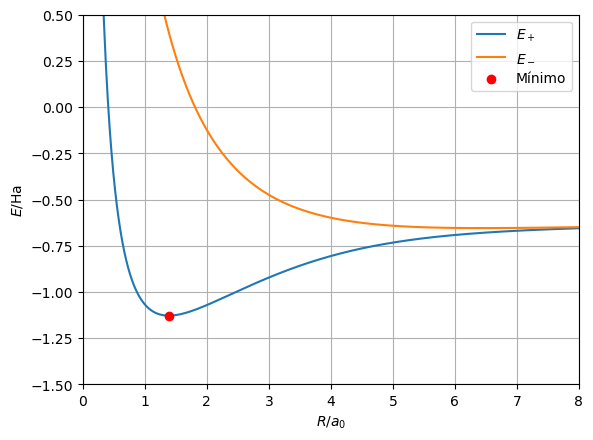

In [54]:
Rarray = np.arange(0.1, 8.0, 0.01)  # Valores de R

zetastar = res.x[0]
Rstar = res.x[1]

plt.plot(Rarray, Eplus(zetastar,Rarray), label=r'$E_+$')
plt.plot(Rarray, Eminus(zetastar,Rarray), label=r'$E_-$')

plt.scatter(Rstar, Eplus(zetastar,Rstar), color='red', label='Mínimo', zorder=10)

plt.xlim(0,8)
plt.ylim(-1.5, 0.5)

plt.grid()

plt.xlabel(r'$R/a_0$')
plt.ylabel(r'$E/$Ha')
plt.legend()